## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")
merged_df

# Display the data table for preview


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [20]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())

print(f"The total number of mice is {number_of_mice} in this study")

The total number of mice is 249 in this study


In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse
                                
 

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"]== "g989"]


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df =merged_df[merged_df["Mouse ID"].isin(duplicate_mouse)==False]
clean_mouse_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [24]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_mouse_df["Mouse ID"].unique())
print (f"There is a total of {mouse_count} mice used in this study")

There is a total of 248 mice used in this study


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_statistics  = merged_df.groupby('Drug Regimen')
summary_statistics_data = summary_statistics .agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics_data

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
means = merged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = merged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = merged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = merged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = merged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

newtable = pd.DataFrame(means)
newtable2 = newtable.rename(columns={"Tumor Volume (mm3)": "Mean"})

newtable2["Median"] = medians
newtable2["Variance"] = variances
newtable2["std"] = standards
newtable2["sem"] = sems

newtable2

Mean     Median   Variance       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

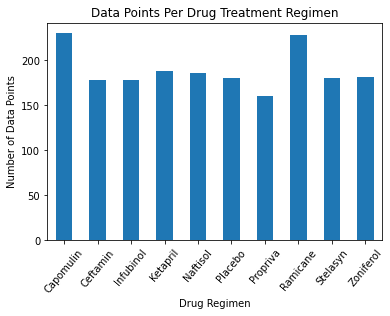

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

datapts2 = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
barPlot = pd.DataFrame(datapts2)

plotDrugRegimen = barPlot.plot.bar(legend=False,rot=50)
plotDrugRegimen
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.savefig('barplot1')

In [28]:
barPlot.head()

Tumor Volume (mm3)
Drug Regimen                    
Capomulin                    230
Ceftamin                     178
Infubinol                    178
Ketapril                     188
Naftisol                     186

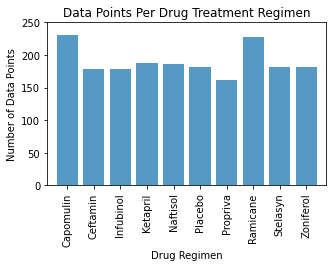

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(datapts2))

tick_locations = [x for x in x_axis]

plt.figure(figsize=(5,3))

newtry = barPlot.reset_index()
newtry

plt.bar(x_axis,barPlot ['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, newtry['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(datapts2)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot2')
plt.show()

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


groupby_gender = merged_df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())


mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender




Total Count  Percentage of Sex
Sex                                   
Female          124          49.799197
Male            125          50.200803

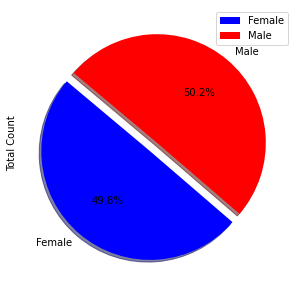

In [31]:
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

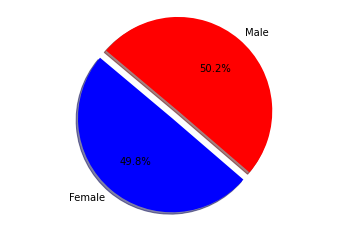

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.799197,50.200803]

colors = ['blue', 'red']

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_eval = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'].isin(drug_list)]


# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_df = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_df.columns = ['Timepoint']
#tumor_volume_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = tumor_volume_df.reset_index()
tumor_vol_final_df = pd.merge(tumor_volume_df, clean_mouse_df, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.999356                 3  
3            38.407618                 1  
4            43.047543                 0  
..                 ...               ...  
95           68.594745                 4  
96           31.896238                 2  
97           64.729837                 3  
98           30.638696                 0  
99           62.754451                 3  

[100 rows x 8 columns]

In [34]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
    # Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# I. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# a.Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
# b. add subset 
    tumor_volumes.append(tumor_vol_by_drug)
# c. Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

#tumor_volumes 
    


For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



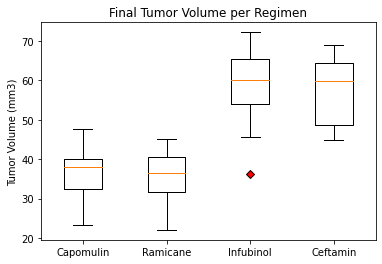

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# format the outliers differently
red_circle = dict(markerfacecolor='r', marker='D')

# plot
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=red_circle)
plt.show();


## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

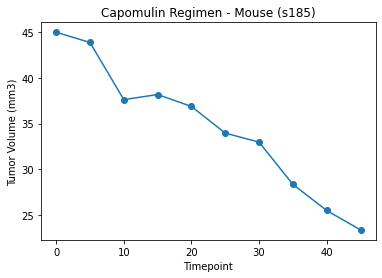

In [170]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

# find a mouse
find_mouse = clean_mouse_df[['Timepoint', 'Tumor Volume (mm3)']].loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_df['Mouse ID']=='s185')]
find_mouse

# plot data
plt.plot(find_mouse['Timepoint'], find_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen - Mouse (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")


(35.0, 46.0)

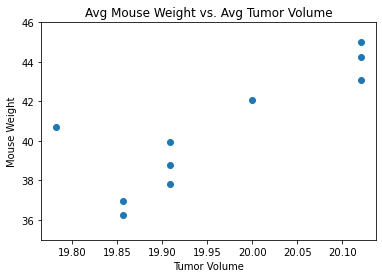

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# we have the average tumor volume for each time point, to be compatible we need the average mouse weight across the timepoints
cap_avg_tumor_wgt = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin'].groupby(clean_mouse_df['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
cap_avg_tumor_wgt.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Mouse Weight vs. Avg Tumor Volume')
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight')
plt.ylim(35,46)

#cap_avg_tumor_wgt


## Correlation and Regression

The correlation between Average Tumor Volume and Mouse Weight is 0.82
The linear regression equation is y = 20.29x + -364.52


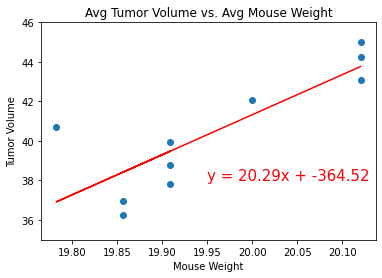

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f'The correlation between Average Tumor Volume and Mouse Weight is {round(correlation[0],2)}')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(amw,atv)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')


atv = cap_avg_tumor_wgt['Average Tumor Volume {mm3}']
amw = cap_avg_tumor_wgt['Average Mouse Weight (g)']
plt.scatter(amw,atv)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)


reg_values = amw * slope + intercept
plt.plot(amw, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15,color="red")
plt.show()